In [17]:
import endpoints.basketball.ncaam as ncaam_endpoints

In [18]:
teams_df = ncaam_endpoints.get_teams()
stats_df = ncaam_endpoints.get_team_stats()

In [19]:
teams_df

,GROUP_ID,DISPLAY_NAME,SLUG,ABBREVIATION,SHORT_NAME,TEAM_NAME,WINS,LOSSES,STANDING,STREAK,GB
ID,,,,,,,,,,,
91,46,Bellarmine Knights,bellarmine_knights,BELL,Bellarmine,Knights,6.0,21.0,12.0,-4.0,11.0
294,46,Jacksonville Dolphins,jacksonville_dolphins,JAX,Jacksonville,Dolphins,13.0,14.0,11.0,-2.0,4.0
338,46,Kennesaw State Owls,kennesaw_state_owls,KENN,Kennesaw St,Owls,14.0,13.0,8.0,-1.0,3.0
2511,46,Queens University Royals,queens_university_royals,QUOC,Queens,Royals,11.0,17.0,9.0,1.0,6.5
2110,46,Central Arkansas Bears,central_arkansas_bears,CARK,C Arkansas,Bears,9.0,20.0,10.0,-2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2617,30,Stephen F. Austin Lumberjacks,stephen_f._austin_lumberjacks,SFA,SF Austin,Lumberjacks,14.0,11.0,6.0,-2.0,9.5
250,30,UT Arlington Mavericks,ut_arlington_mavericks,UTA,UT Arlington,Mavericks,13.0,13.0,4.0,1.0,11.0
2547,30,Seattle U Redhawks,seattle_u_redhawks,SEA,Seattle U,Redhawks,16.0,10.0,3.0,2.0,8.0


In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [21]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

2250 2250
2571 2571
12 12
198 198
2294 2294
5 5
189 189
150 150
2084 2084
2649 2649
163 163
2599 2599
333 333
96 96
2509 2509
2198 2198
172 172
93 93
2678 2678
2545 2545
154 154
2447 2447
2057 2057
2 2
2305 2305
232 232
2377 2377
2803 2803
2458 2458
2275 2275
2710 2710
153 153
253 253
526 526
231 231
183 183
2539 2539
2623 2623
2541 2541
2443 2443
239 239
331 331
2643 2643
2000 2000
357 357
147 147
47 47
139 139
2692 2692
8 8
2750 2750
2344 2344
113 113
2142 2142
2546 2546
2277 2277
2166 2166
98 98
26 26
325 325
2427 2427
193 193
2348 2348
2737 2737
314 314
235 235
233 233
256 256
2415 2415
2393 2393
2547 2547
248 248
112358 112358
261 261
41 41
2449 2449
338 338
2900 2900
2535 2535
140 140
2617 2617
2460 2460
2681 2681
356 356
2473 2473
2050 2050
2450 2450
252 252
167 167
2501 2501
236 236
2287 2287
242 242
2752 2752
2226 2226
269 269
195 195
276 276
288 288
2390 2390
2181 2181
299 299
2466 2466
2567 2567
2540 2540
2378 2378
2502 2502
55 55
2633 2633
2870 2870
328 328
36 36
48 48
2335

Text(0.325, 0.17, 'Avg. xG For')

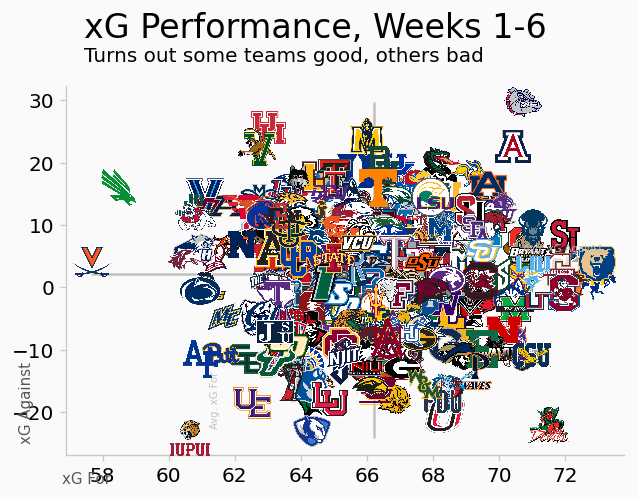

In [24]:
# Set font and background colour
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(stats_df['PACE'], stats_df['NET_RTG'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in stats_df.iterrows():
    print(index, row.name)
    try:
        team_name = teams_df.loc[index]["SLUG"]
        ab = AnnotationBbox(getImage(f"data\\basketball\\ncaam\\team_logos\\{team_name}_logo.png"), (row['PACE'], row['NET_RTG']), frameon=False)
        ax.add_artist(ab)
    except Exception as e:
        print(f"No team with ID {index}")

# Add average lines
plt.hlines(stats_df['NET_RTG'].mean(), stats_df['PACE'].min(), stats_df['PACE'].max(), color='#c2c1c0')
plt.vlines(stats_df['PACE'].mean(), stats_df['NET_RTG'].min(), stats_df['NET_RTG'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.15,.98,'xG Performance, Weeks 1-6',size=20)
fig.text(.15,.93,'Turns out some teams good, others bad', size=12)

## Avg line explanation
fig.text(.06,.14,'xG Against', size=9, color='#575654',rotation=90)
fig.text(.12,0.05,'xG For', size=9, color='#575654')

## Axes titles
fig.text(.76,.535,'Avg. xG Against', size=6, color='#c2c1c0')
fig.text(.325,.17,'Avg. xG For', size=6, color='#c2c1c0',rotation=90)